In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr, chisquare
from statsmodels.stats.multitest import fdrcorrection
from function import barplot_annotate_brackets
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
os.makedirs('../Figure/Supplementary Figure4', exist_ok=True)

# Load raw_data

In [3]:
# obtain TE metadata
Dfam_RM_family = pd.read_csv('../data/TE/TE_metadata_with_Liftover.csv')
Dfam_RM_family.index = Dfam_RM_family['repeat subfamily name']
Dfam_RM_family.head()

,repeat subfamily name,repeat family name,repeat class,repeat classification,repeat region,repeat consensus length,repeat copy count,repeat copy count after filtering,branch
repeat subfamily name,,,,,,,,,
5S,5S,5S,rRNA,NaN,NaN,121,1224,189.0,Amniota
7SK,7SK,7SK,snRNA,NaN,NaN,331,508,23.0,Boreoeutheria
7SLRNA,7SLRNA,7SLRNA,SINE,Alu,NaN,320,4105,569.0,Primates
ACRO1,ACRO1,ACRO1,Satellite,acromeric,NaN,147,291,248.0,Mammalia
ALRa,ALRa,ALR,Satellite,centromeric,NaN,172,28338,25082.0,Homininae


In [4]:
# ChIP-seq metadata
KZFP_metadata = pd.read_csv('../data/ChIP-seq/KZFP_ChIP-seq_metadata.csv')

# load TE targets
KZFP_target = pd.read_csv('../data/targets/TE_targets_for_analysis.csv')
display(KZFP_target.head())

# load KRAB-ZFP metadata
KZFP_dataset_df = pd.read_csv('../data/ChIP-seq/KZFP_metadata.csv', index_col=0)
KZFP_dataset_df = KZFP_dataset_df[KZFP_dataset_df['classification (Genome research)']=='protein_coding']
KZFP_dataset_df.head()

,KZFP gene symbol,repeat subfamily name,ratio,p value,q value,log10 q value,normalized score,rank,criteria,overlap peak count to all copies,...,repeat class,repeat classification,emergence era of TE subfamily,evolutionary age of TE subfamily,emegence era of TE subfamily is in primate,emergence era of KZFP for analysis,evolutionary age of KZFP for analysis,evolutionary age of KZFP in Imbeault et al.,evolutionary age of KZFP in Tribolet-Hardy et al.,emegence era of KZFP is in primate
0,ZNF93,L1P1_5end,150.130049,0.000000e+00,3.611620e-321,320.442298,1.000000,Primary,True,1718,...,LINE,L1,Hominoidea,20.2,True,Homininae,9.1,19.9,9.1,True
1,ZNF93,L1P2_5end,65.562098,0.000000e+00,3.611620e-321,320.442298,1.000000,Primary,True,527,...,LINE,L1,Catarrhini,29.4,True,Homininae,9.1,19.9,9.1,True
2,ZNF92,THE1D-int,233.763677,1.983704e-270,2.900175e-267,266.537576,1.000000,Primary,True,132,...,ERV/LTR,ERV/LTR,Simiiformes,43.2,True,Simiiformes,43.2,43.1,43.2,True
3,ZNF90,HERVH_3,31.989636,5.512524e-100,8.059310e-97,96.093702,1.000000,Primary,True,90,...,ERV/LTR,ERV/LTR,Hominidae,15.8,True,Homininae,9.1,15.8,9.1,True
4,ZNF90,HERVH_1,32.425278,1.657565e-89,1.211680e-86,85.916612,0.894092,Secondary,True,80,...,ERV/LTR,ERV/LTR,Hominidae,15.8,True,Homininae,9.1,15.8,9.1,True


,gene_name,gene_id,classification (Genome research),Age,Age (Genome research),Age adjusted,Species,KRAB domain,interactK1,interact with,Number of ZNFs,z_C2H2_miss,cluster
PRDM7,NaN,NaN,protein_coding,NaN,352.0,352.0,NaN,NaN,NaN,NaN,NaN,NaN,noCluster
ZNF705A,ZNF705A,ENSG00000196946,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,3.0,-0.910143,noCluster
ZNF705B,ZNF705B,ENSG00000215356,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,3.0,NaN,noCluster
ZNF705G,ZNF705G,ENSG00000215372,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,2.0,6.659968,noCluster
ZNF212,ZNF212,ENSG00000170260,protein_coding,179.2,312.1,312.0,Platypus,NaN,NO,NaN,3.0,-0.910143,chr7.3


# process raw_data

In [5]:
branch_dict = {'Vertebrata':530, 'Dipnotetrapodomorpha':413, 'Tetrapoda':352, 'Amniota':312.1, 'Mammalia':179.2, 'Theria':159, 'Eutheria':105, 'Boreoeutheria':96, 'Euarchontoglires': 90, 'Primatomorpha':76, 
               'Primates':74, 'Haplorrhini':63, 'Simiiformes':43.2, 'Catarrhini':29.4, 'Hominoidea':20.2, 'Hominidae':15.8, 'Homininae':9.1, 'Hominini':6.7, 'Homo sapiens':0, np.nan:None}

Age_dict = {352.0: 'Tetrapoda', 312.1: 'Amniota', 312.0: 'Amniota', 163.7:'Mammalia', 159.0: 'Theria', 105.0: 'Eutheria', 96.0: 'Boreoeutheria', 97.5: 'Boreoeutheria', 90.0: 'Euarchontoglires', 90.9: 'Euarchontoglires', 76: 'Primatomorpha', 75.9: 'Primatomorpha', 
            74.0: 'Primates', 63: 'Haplorrhini', 43.2:'Simiiformes', 43.1:'Simiiformes', 29.4: 'Catarrhini', 29.1: 'Catarrhini', 20.2:'Hominoidea', 15.8: 'Hominidae', 9.1: 'Homininae', 6.7: 'Hominini', 0: 'Homo sapiens', 'nan': np.nan}

Dfam_RM_family['Age'] = Dfam_RM_family['branch'].apply(lambda x:branch_dict[x])

# Supplementary Fig.4A

In [6]:
KZFP_ChIP_num = KZFP_metadata[KZFP_metadata['KZFP gene symbol'].isin(KZFP_dataset_df.index)]
len(pd.unique(KZFP_ChIP_num['KZFP gene symbol']))

361

(array([266,  95]),
 True     0.736842
 False    0.263158
 Name: proportion, dtype: float64)

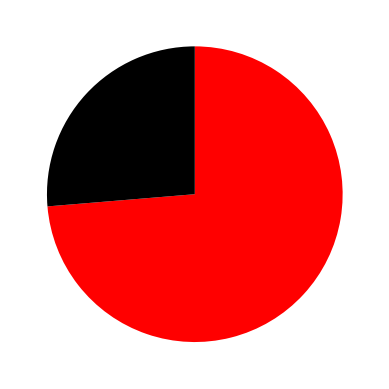

In [7]:
fig = plt.figure()

data = pd.Series(pd.unique(KZFP_ChIP_num['KZFP gene symbol'])).isin(KZFP_target['KZFP gene symbol'])
count = data.value_counts()

value = count.values

plt.pie(value, counterclock=False, startangle=90, colors=['red', 'black'])
fig.savefig('../Figure/Supplementary Figure4/Supplementary Figure4A.png', bbox_inches='tight', dpi=300)

count.values, data.value_counts(normalize=True)

# Supplementary Fig.4B

(array([797, 472]),
 1269,
 repeat subfamily name
 False    0.628054
 True     0.371946
 Name: proportion, dtype: float64)

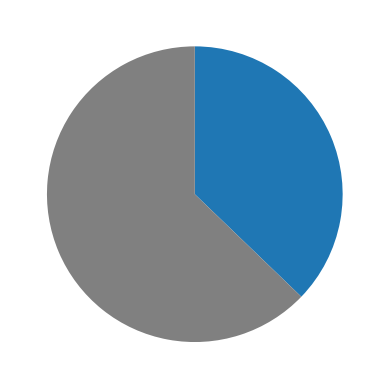

In [8]:
# subfamily level
fig = plt.figure()

TE_class_list = ['DNA', 'ERV/LTR', 'ERV/Int', 'LINE', 'SINE', 'Retroposon']
Dfam_RM_family_fil = Dfam_RM_family[(Dfam_RM_family['repeat class'].isin(TE_class_list))]
data = Dfam_RM_family_fil['repeat subfamily name'].isin(KZFP_target['repeat subfamily name'])

count = data.value_counts()
value = count.sort_index(ascending=False).values

plt.pie(value, counterclock=False, startangle=90, colors=['tab:blue', 'grey'])
fig.savefig('../Figure/Supplementary Figure4/Supplementary Figure4B_left.png', bbox_inches='tight', dpi=300)

count.values, count.sum(), data.value_counts(normalize=True)

(array([387, 146]),
 True
 False    0.726079
 True     0.273921
 Name: proportion, dtype: float64)

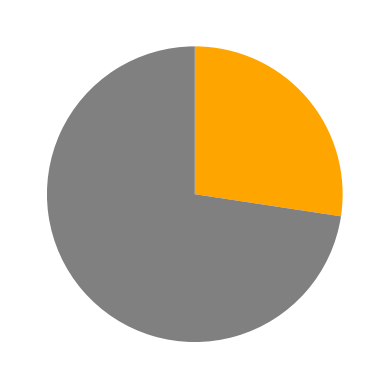

In [9]:
# family level
fig = plt.figure()

TE_class_list = ['DNA', 'ERV/LTR', 'ERV/Int', 'LINE', 'SINE', 'Retroposon']
Dfam_RM_family_fil = Dfam_RM_family[(Dfam_RM_family['repeat class'].isin(TE_class_list))]
data = Dfam_RM_family_fil['repeat subfamily name'].isin(KZFP_target['repeat subfamily name'])

crosstab = pd.crosstab(Dfam_RM_family_fil['repeat family name'], data)
count = (crosstab[True]>=1).value_counts()
value = count.sort_index(ascending=False).values

plt.pie(value, counterclock=False, startangle=90, colors=['orange', 'grey'])
fig.savefig('../Figure/Supplementary Figure4/Supplementary Figure4B_right.png', bbox_inches='tight', dpi=300)

count.values, (crosstab[True]>=1).value_counts(normalize=True)

# Supplementary Fig.4C

In [10]:
TE_class_list = ['DNA', 'ERV/LTR', 'LINE', 'SINE', 'Retroposon']
Dfam_RM_family_TE = Dfam_RM_family[Dfam_RM_family['repeat class'].isin(TE_class_list)]

expected_norm = Dfam_RM_family_TE['repeat class'].value_counts(normalize=True)
observed = KZFP_target['repeat class'].value_counts()
observed_norm = KZFP_target['repeat class'].value_counts(normalize=True)
pvalue_list = list()
for TE_class in TE_class_list:
    exp = expected_norm.loc[TE_class]
    obs = observed.loc[TE_class]
    N = observed.sum()

    exp_list = [exp*N, (1-exp)*N]
    obs_list = [obs, N-obs]

    p = chisquare(obs_list, exp_list)
    pvalue_list.append([TE_class, p.pvalue, obs/exp/N])

pvalue_df = pd.DataFrame(pvalue_list, columns=['repeat class', 'pvalue', 'ratio'])
pvalue_df['qvalue'] = fdrcorrection(pvalue_df['pvalue'])[1]
pvalue_df

,repeat class,pvalue,ratio,qvalue
0,DNA,4.136284e-105,0.060629,1.034071e-104
1,ERV/LTR,4.059277e-21,1.229213,6.765461e-21
2,LINE,4.763783e-09,1.354327,5.954728e-09
3,SINE,1.058724e-01,1.183972,1.058724e-01
4,Retroposon,7.827441e-273,14.203125,3.913721e-272


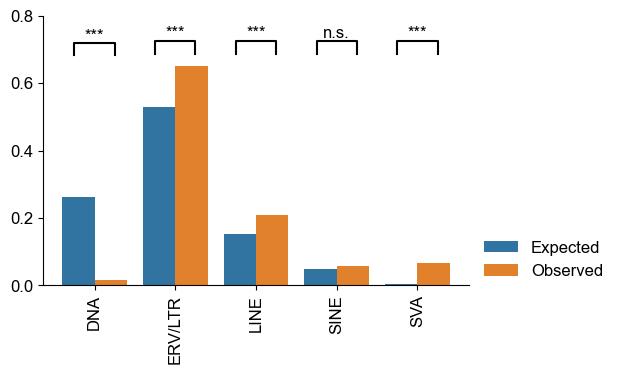

In [11]:
# visualization
fig = plt.figure(figsize=[5.5, 3.5], dpi=100)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

data = pd.concat([expected_norm.rename('Expected'), observed_norm.rename('Observed')], axis=1).reset_index()
melt = data.melt(id_vars='repeat class')
x = melt['repeat class']
y = melt['value']
hue = melt['variable']
order = TE_class_list

p = sns.barplot(x=x, y=y, hue=hue, order=TE_class_list, palette=['tab:blue', 'tab:orange'])

for i in range(len(TE_class_list)):
    qvalue = pvalue_df.iloc[i]['qvalue']
    barplot_annotate_brackets(0, 1, qvalue, [i-0.25, i+0.25], [0.65, 0.65], maxasterix=3)
    
    

plt.legend(loc=[1.02, 0], frameon=False)
p.spines['right'].set_visible(False)
p.spines['top'].set_visible(False)
plt.xticks(range(len(TE_class_list)), labels=['DNA', 'ERV/LTR', 'LINE', 'SINE', 'SVA'], rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8])
plt.ylim(0, 0.8)

fig.savefig('../Figure/Supplementary Figure4/Supplementary Figure4C.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure4/Supplementary Figure4C.pdf', bbox_inches='tight', transparent=True, dpi=300)

plt.show()

# Supplementary Fig.4D

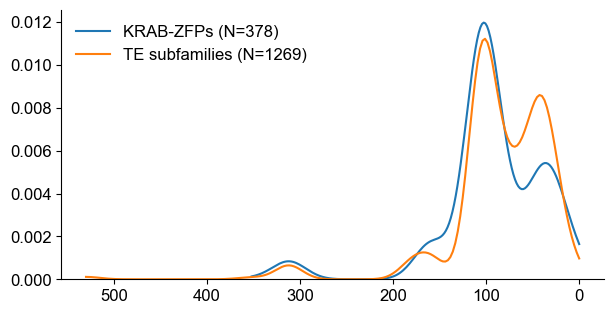

In [12]:
fig = plt.figure(figsize=[7, 3.5])
ax = plt.subplot()

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

data1 = KZFP_dataset_df
data2 = Dfam_RM_family[Dfam_RM_family['repeat class'].isin(TE_class_list)]

p = sns.kdeplot(x=-data1['Age adjusted'], cut=0, label='KRAB-ZFPs (N={})'.format(len(data1)), ax=ax)
sns.kdeplot(x=-data2['Age'], cut=0, label='TE subfamilies (N={})'.format(len(data2)), ax=ax)

p.spines['right'].set_visible(False)
p.spines['top'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.xticks(labels=[500, 400, 300, 200, 100, 0], ticks=[-500, -400, -300, -200, -100, 0])
plt.legend(frameon=False)

fig.savefig('../Figure/Supplementary Figure4/Supplementary Figure4D.png', dpi=300)
fig.savefig('../Figure/Supplementary Figure4/Supplementary Figure4D.pdf', transparent=True, dpi=300)

# Supplementary Fig.4E

1504


<Figure size 640x480 with 0 Axes>

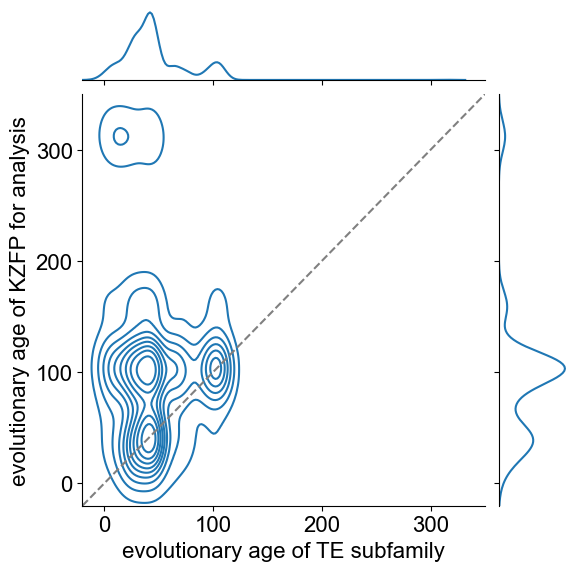

In [13]:
# both primary and secondary targets
fig= plt.figure(dpi=100)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16

data = KZFP_target
x = data['evolutionary age of TE subfamily']
y = data['evolutionary age of KZFP for analysis']

print(len(data))

# jointplot
p = sns.jointplot(x=x, y=y, linewidth=0, kind='kde')

# 対角線
x = np.linspace(-20, 350)
p.ax_joint.plot(x, x, color='grey', linestyle='dashed')

p.ax_marg_x.set_xlim(-20, 350)
p.ax_marg_y.set_ylim(-20, 350)
p.ax_marg_y.set_yticks([0, 100, 200, 300])

plt.savefig('../Figure/Supplementary Figure4/Supplementary Figure4E.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure4/Supplementary Figure4E.pdf', bbox_inches='tight', transparent=True, dpi=300)

plt.show()

# Supplementary Fig.4F

268
SignificanceResult(statistic=nan, pvalue=nan)


<Figure size 640x480 with 0 Axes>

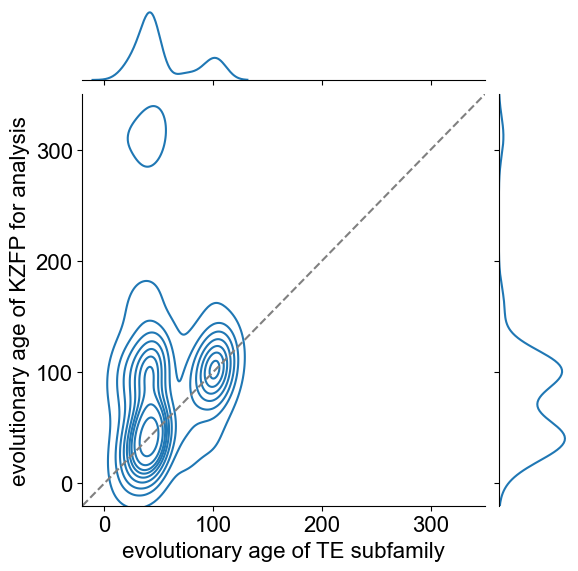

209
SignificanceResult(statistic=nan, pvalue=nan)


<Figure size 640x480 with 0 Axes>

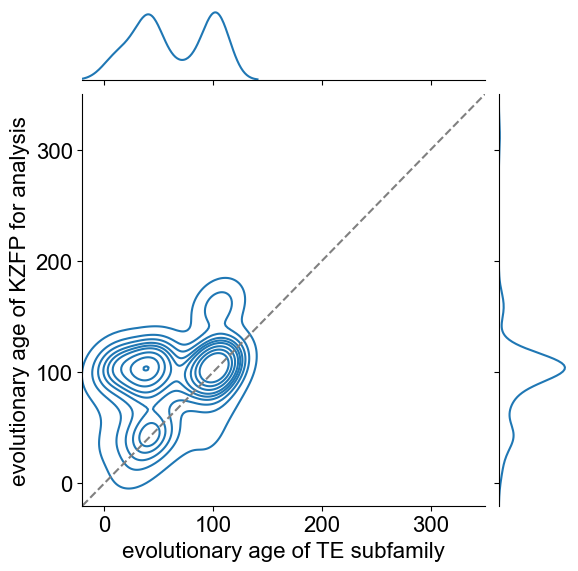

In [14]:
for TE_class in ['ERV/LTR', 'LINE']:

    fig= plt.figure()
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 16

    data = KZFP_target[(KZFP_target['rank']=='Primary') & (KZFP_target['repeat class']==TE_class)]
    x = data['evolutionary age of TE subfamily']
    y = data['evolutionary age of KZFP for analysis']

    print(len(data))
    print(spearmanr(x, y))

    # jointplot
    p = sns.jointplot(x=x, y=y, linewidth=0, kind='kde')

    x = np.linspace(-20, 350)
    p.ax_joint.plot(x, x, color='grey', linestyle='dashed')

    p.ax_marg_x.set_xlim(-20, 350)
    p.ax_marg_y.set_ylim(-20, 350)
    p.ax_marg_y.set_yticks([0, 100, 200, 300])

    plt.rcParams["font.family"] = "Arial"
    plt.savefig('../Figure/Supplementary Figure4/Supplementary Figure4F_{}.png'.format(TE_class.replace('/', '_')), bbox_inches='tight', dpi=300)
    plt.savefig('../Figure/Supplementary Figure4/Supplementary Figure4F_{}.pdf'.format(TE_class.replace('/', '_')), bbox_inches='tight', transparent=True, dpi=300)

    plt.show()

# Supplementary Fig.4G

In [15]:
result = list()

### Primary only
data = KZFP_target[KZFP_target['rank']=='Primary']

# consistence in observed data
consistent = (data['evolutionary age of TE subfamily'] == data['evolutionary age of KZFP for analysis'])

# calcurate expected consistence
average = 0
for _ in range(100):
    TE_age = data['evolutionary age of TE subfamily'].values
    KZFP_age_random = data['evolutionary age of KZFP for analysis'].sample(frac=1).values
    average += (TE_age == KZFP_age_random).mean() / 100

expected = [average*len(data), (1-average)*len(data)]
observed = [consistent.sum(), len(data)-consistent.sum()]
result.append([average, consistent.mean()])
pvalue = chisquare(expected, observed).pvalue
print('Primary', pvalue)

### All
data = KZFP_target

# consistence in observed data
consistent = (data['emergence era of TE subfamily'] == data['emergence era of KZFP for analysis'])

# calcurate expected consistence
average = 0
for _ in range(100):
    TE_age = data['emergence era of TE subfamily'].values
    KZFP_age_random = data['emergence era of KZFP for analysis'].sample(frac=1).values
    average += (TE_age == KZFP_age_random).mean() / 100

expected = [average*len(data), (1-average)*len(data)]
observed = [consistent.sum(), len(data)-consistent.sum()]
result.append([average, consistent.mean()])
pvalue = chisquare(expected, observed).pvalue
print('All', pvalue)

result_df = pd.DataFrame(result, index=['Primary', 'All'], columns=['Expected', 'Observed'])

Primary 1.0276504582889465e-18
All 1.7135806039272433e-25


2.155273250016601e-15


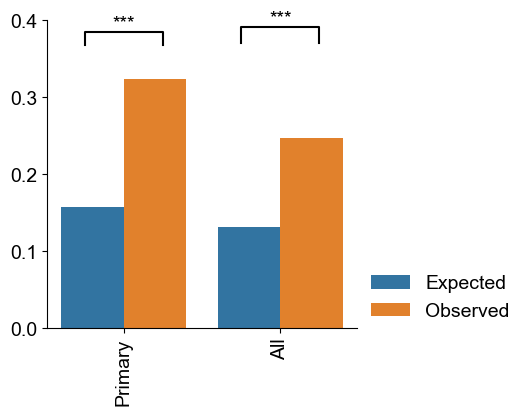

In [17]:
# visualization
fig = plt.figure(figsize=[4, 4], dpi=100)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

ax = plt.subplot()

data = result_df.reset_index()
melt = data.melt(id_vars='index')
x = melt['index']
y = melt['value']
hue = melt['variable']
p = sns.barplot(x=x, y=y, hue=hue, ax=ax)
#p = result_df.plot.bar(figsize=[5, 4], color=['tab:blue', 'tab:orange'], ax=ax)

# Statistical testing
pvalue = chi2_contingency(crosstab).pvalue
print(pvalue)

barplot_annotate_brackets(0, 1, '***', [-0.25, 0.25], [0.35, 0.35], maxasterix=3)
barplot_annotate_brackets(0, 1, '***', [0.75, 1.25], [0.35, 0.35], maxasterix=3)


plt.legend(loc=[1.02, 0], frameon=False)
p.spines['right'].set_visible(False)
p.spines['top'].set_visible(False)
plt.xticks([0, 1], labels=['Primary', 'All'], rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.yticks([0, 0.1, 0.2, 0.3, 0.4])
plt.ylim(0, 0.4)

fig.savefig('../Figure/Supplementary Figure4/Supplementary Figure4G.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure4/Supplementary Figure4G.pdf', bbox_inches='tight', transparent=True, dpi=300)

plt.show()

# Supplementary Fig.4H

In [18]:
# estimate preference
def return_preference(x):

    if x == 1:

        return 'primate-specific TE only'
    
    elif x == 0:

        return 'non-primate TE only'
    
    else:

        return 'both'

data = KZFP_target[['KZFP gene symbol', 'emegence era of TE subfamily is in primate', 'emegence era of KZFP is in primate']]
data[['emegence era of TE subfamily is in primate', 'emegence era of KZFP is in primate']] = data[['emegence era of TE subfamily is in primate', 'emegence era of KZFP is in primate']].astype('int64')
groupby = data[['KZFP gene symbol', 'emegence era of TE subfamily is in primate', 'emegence era of KZFP is in primate']].groupby(by=['KZFP gene symbol', 'emegence era of KZFP is in primate']).mean().reset_index()
groupby['preference'] = groupby['emegence era of TE subfamily is in primate'].apply(return_preference)


3.2171961985811755e-10


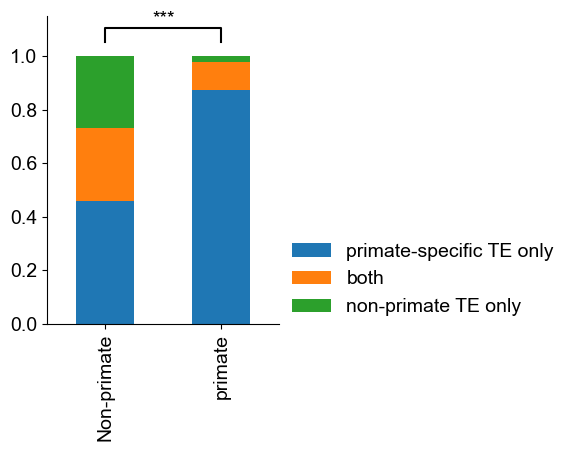

In [19]:

# visualization
fig = plt.figure(figsize=[3, 5], dpi=100)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

ax = plt.subplot()
crosstab = pd.crosstab(groupby['emegence era of KZFP is in primate'], groupby['preference'])
crosstab_norm = pd.crosstab(groupby['emegence era of KZFP is in primate'], groupby['preference'], normalize='index')
crosstab_norm = crosstab_norm[['primate-specific TE only', 'both', 'non-primate TE only']]
p = crosstab_norm.plot.bar(stacked=True, figsize=[3, 4], ax=ax)

# Statistical testing
pvalue = chi2_contingency(crosstab).pvalue
print(pvalue)

barplot_annotate_brackets(0, 1, '***', [0, 1], [1.0, 1.0], maxasterix=3)


plt.legend(loc=[1.02, 0], frameon=False)
p.spines['right'].set_visible(False)
p.spines['top'].set_visible(False)
plt.xticks([0, 1], labels=['Non-primate', 'primate'])
plt.xlabel('')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.ylim(0, 1.15)

fig.savefig('../Figure/Supplementary Figure4/Supplementary Figure4H.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure4/Supplementary Figure4H.pdf', bbox_inches='tight', transparent=True, dpi=300)

plt.show()